In [10]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.neighbors import KNeighborsClassifier
import gc

# Importing sklearn libraries
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
!pip3 install xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import OneHotEncoder

# import lightgbm model
!pip3 install lightgbm
import lightgbm as lgb

plt.style.use('seaborn-darkgrid')
color = sns.color_palette()
%matplotlib inline

In [11]:
os.chdir('C:/Users/utkar/Documents/Case Competitions/Tredence Hackathon/Retail Recommender Data/dataset/Raw Data')
aisle = pd.read_csv('aisles.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
departments = pd.read_csv('departments.csv')
order_prior = pd.read_csv('order_products__prior.csv')
order_train = pd.read_csv('train.csv')
order_test = pd.read_csv('test.csv')

## Reading all Files individually

In [12]:
#aisle.head()
#orders.head()
#products.head()
#departments.head()
#order_prior.head()
#order_train.head()
#order_test.head()

## Check for missing values


In [13]:
orders.isna().value_counts()

order_id  user_id  eval_set  order_number  order_dow  order_hour_of_day  days_since_prior_order
False     False    False     False         False      False              False                     3214874
                                                                         True                       206209
dtype: int64

In [14]:
products.isna().value_counts()

product_id  product_name  aisle_id  department_id
False       False         False     False            49688
dtype: int64

In [15]:
aisle.isna().value_counts()

aisle_id  aisle
False     False    134
dtype: int64

In [16]:
departments.isna().value_counts()

department_id  department
False          False         21
dtype: int64

In [17]:
order_train.isna().value_counts()

order_id  product_id  add_to_cart_order  reordered  user_id  ID   
False     False       False              False      False    False    787911
dtype: int64

In [18]:
order_test.isna().value_counts()

order_id  product_id  add_to_cart_order  user_id  ID   
False     False       False              False    False    143974
dtype: int64

In [19]:
order_prior.isna().value_counts()
order_prior.info()
order_prior.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


order_id             3214874
product_id             49677
add_to_cart_order        145
reordered                  2
dtype: int64

In [20]:
order_train.isna().value_counts()
order_train.info()
order_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787911 entries, 0 to 787910
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   order_id           787911 non-null  int64
 1   product_id         787911 non-null  int64
 2   add_to_cart_order  787911 non-null  int64
 3   reordered          787911 non-null  int64
 4   user_id            787911 non-null  int64
 5   ID                 787911 non-null  int64
dtypes: int64(6)
memory usage: 36.1 MB


,order_id,product_id,add_to_cart_order,reordered,user_id,ID
0,1187899,27845,9,0,1,14
1,1187899,38928,3,1,1,2
2,1187899,39657,5,1,1,21
3,1187899,26405,4,1,1,119001
4,1187899,196,1,1,1,10


# EDA

### Analyzing orders dataframe

In [21]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [22]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [23]:
# No null values
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

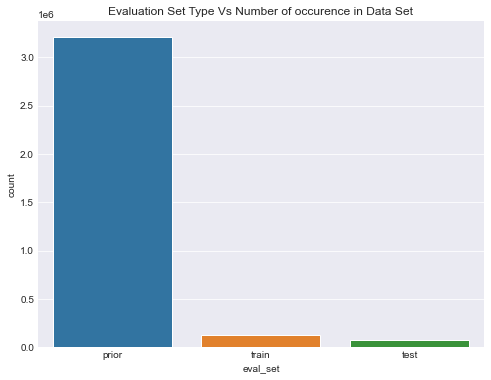

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
ax= sns.countplot(x='eval_set', data= orders)
ax.set_title('Evaluation Set Type Vs Number of occurence in Data Set', fontsize=12)

plt.show()

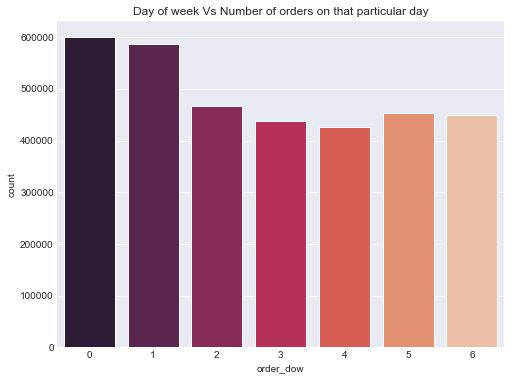

In [25]:
plt.figure(figsize=(8,6))
ax= sns.countplot(x='order_dow', data= orders, palette='rocket')
ax.set_title('Day of week Vs Number of orders on that particular day', fontsize=12)

plt.show()

#### We can see that maximum number of orders is on Sunday, followed by monday. which makes sense as people will want to buy groceries either at the weekend or start of the week. Mid-week has less number of orders with minimum orders on thursday.

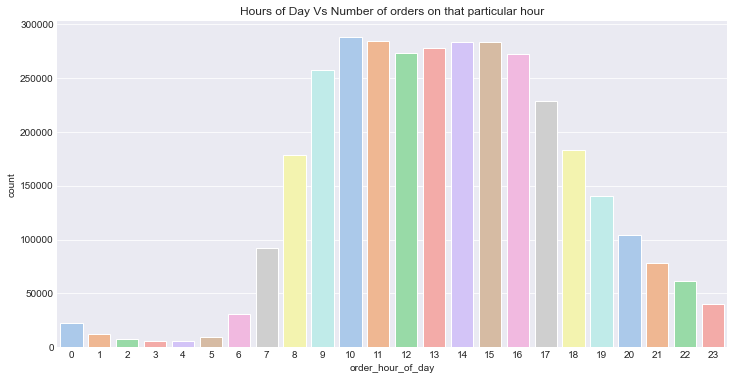

In [26]:
plt.figure(figsize=(12,6))
ax= sns.countplot(x='order_hour_of_day', data= orders, palette='pastel')
ax.set_title('Hours of Day Vs Number of orders on that particular hour', fontsize=12)

plt.show()

##### Maximum number of orders are from 10 am - 5pm. At night between 1-5am orders are the least as that is when people are sleeping.

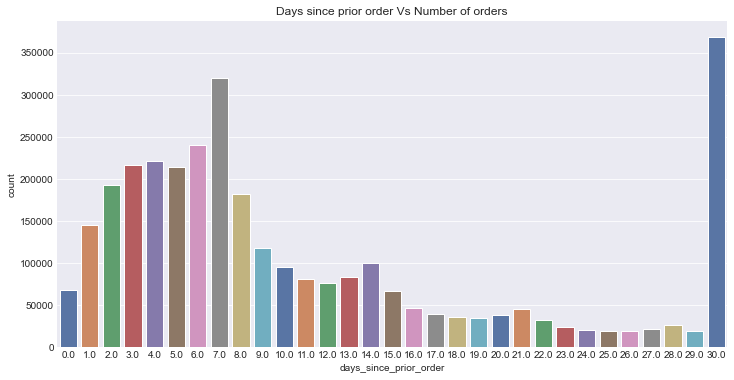

In [27]:
plt.figure(figsize=(12,6))
ax= sns.countplot(x='days_since_prior_order', data= orders, palette='deep')
ax.set_title('Days since prior order Vs Number of orders', fontsize=12)

plt.show()

#### From the graph it is clear that there is a peak on 7th day, then local peaks at day 14,day 21 and day 28. Then there is a global peak on day 30 meaning monthly peak

In [28]:
#Group orders according to day of week and hour of day for better visualization
orders_grouped = orders.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate('count').reset_index()
orders_grouped

,order_dow,order_hour_of_day,order_number
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813
...,...,...,...
163,6,19,18346
164,6,20,13392
165,6,21,10501
166,6,22,8532


In [29]:
#pivoting the data set 
#This table shows no. of orders on all days of week on a particular hour of day .
orders_grouped= orders_grouped.pivot('order_dow','order_hour_of_day', 'order_number')
orders_grouped

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


<AxesSubplot:xlabel='order_hour_of_day', ylabel='order_dow'>

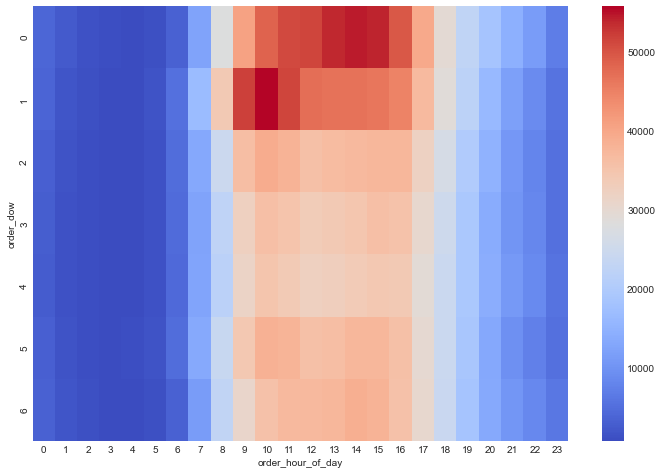

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(orders_grouped, cmap='coolwarm')

#### Maximum order numbers are either on sunday 2 PM or on monday 10 AM

In [31]:
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [32]:
order_prior['reordered'].sum()

19126536

In [33]:
len(order_prior)

32434489

In [34]:
order_prior['reordered'].sum()/len(order_prior)

0.5896974667922161

In [35]:
order_train['reordered'].sum()/len(order_train)

0.6065507398678277

In [36]:
order_train1=order_train.drop(['user_id','ID'],axis=1)
order_train1

,order_id,product_id,add_to_cart_order,reordered
0,1187899,27845,9,0
1,1187899,38928,3,1
2,1187899,39657,5,1
3,1187899,26405,4,1
4,1187899,196,1,1
...,...,...,...,...
787906,2807393,18599,5,0
787907,2807393,30434,18,0
787908,2807393,18526,10,0
787909,187677,5876,3,1


In [37]:
#Combining order_products_train and order_products_prior as order_products.
order_products=order_prior.append(order_train1)
order_products

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
787906,2807393,18599,5,0
787907,2807393,30434,18,0
787908,2807393,18526,10,0
787909,187677,5876,3,1


In [38]:
aisle.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [39]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [40]:
order_products = order_products.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisle, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [41]:
order_products.shape

(33222400, 15)

In [42]:
#Reducing memory usage for faster analysis

def reduce_memory(df):
    
    """
    This function reduce the dataframe memory usage by converting it's type for easier handling.
    
    Parameters: Dataframe
    Return: Dataframe
    """
    
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    
    for col in df.columns:
        if df[col].dtypes in ["int64", "int32", "int16"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            
            elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            
            elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
        
        if df[col].dtypes in ["float64", "float32"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            
            elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
    
    print("")
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    
    return df

In [43]:
order_products = reduce_memory(order_products)

Memory usage of properties dataframe is : 4055.46875  MB

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  1996.051025390625  MB
This is  49.21875 % of the initial size


In [44]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [45]:
#Aisles
temp_df = order_products.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()
temp_df.head()

,aisle,total,reorders
0,fresh fruits,3728941,2679862.0
1,fresh vegetables,3503415,2084453.0
2,packaged vegetables fruits,1810080,1156888.0
3,yogurt,1484050,1019002.0
4,packaged cheese,1003292,587555.0


### Total Orders and Reorders From Most Popular Aisles

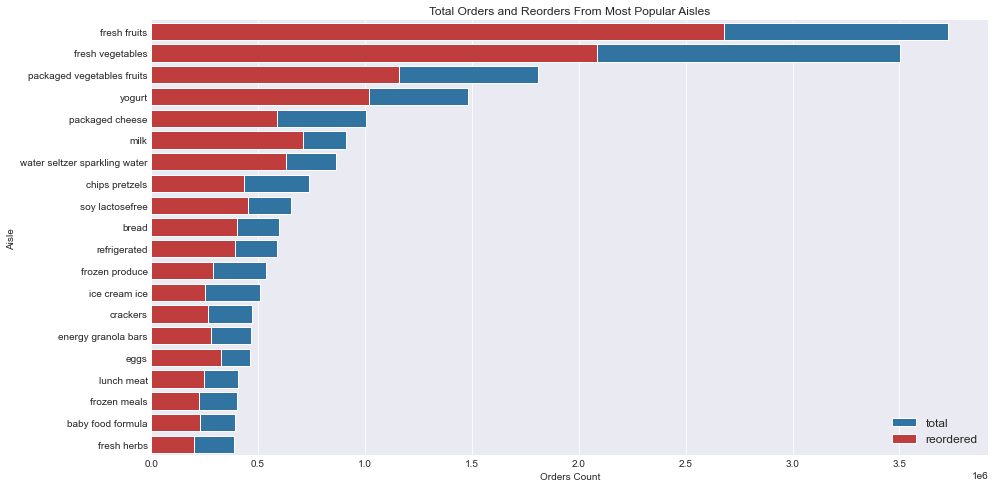

In [46]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorders[0:20], color=color[3], label = "reordered")
ax.set_ylabel("Aisle")
ax.set_xlabel("Orders Count")
ax.set_title("Total Orders and Reorders From Most Popular Aisles")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [47]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()
temp_df.head()

,index,aisle,total,reorders,reorder_ratio
0,5,milk,910023,711435.0,0.781777
1,6,water seltzer sparkling water,862743,629802.0,0.730000
2,0,fresh fruits,3728941,2679862.0,0.718666
3,15,eggs,463645,327374.0,0.706088
4,8,soy lactosefree,653485,452621.0,0.692626


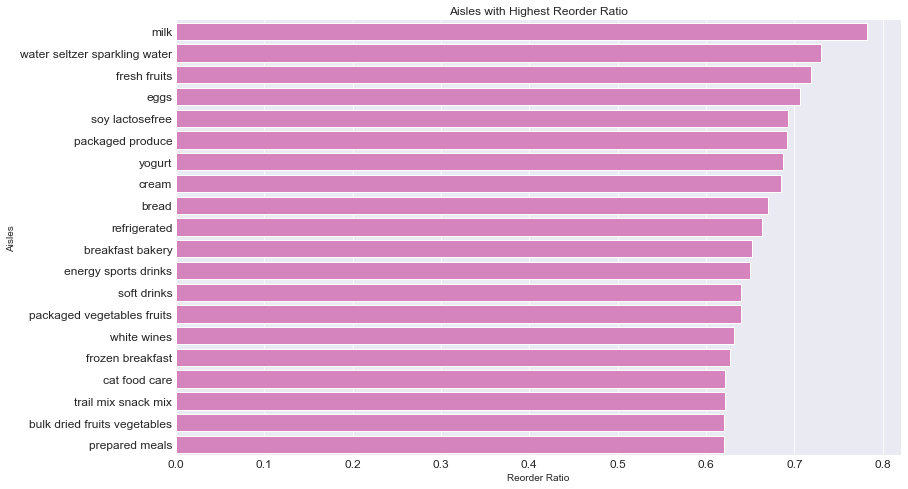

In [48]:
#Top Aisles with Highest Reorder Ratio
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorder_ratio[0:20], color=color[6])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

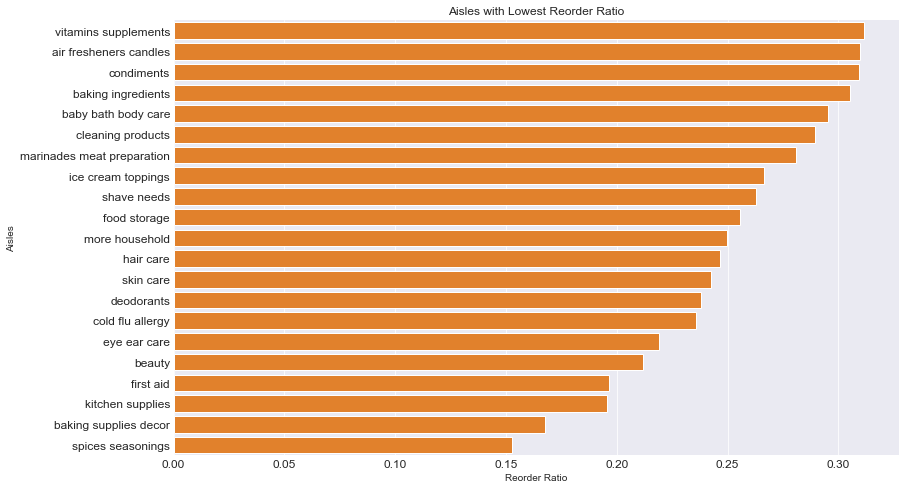

In [49]:
#Aisles with Lowest Reorder Ratio
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[-21:], x = temp_df.reorder_ratio[-21:], color=color[1])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Lowest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

In [50]:
#Departments
temp_df = order_products.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()
temp_df.head()

,department,total,reorders
0,produce,9712998,6317578.0
1,dairy eggs,5538593,3712173.0
2,snacks,2954899,1697767.0
3,beverages,2755734,1801651.0
4,frozen,2293169,1244210.0


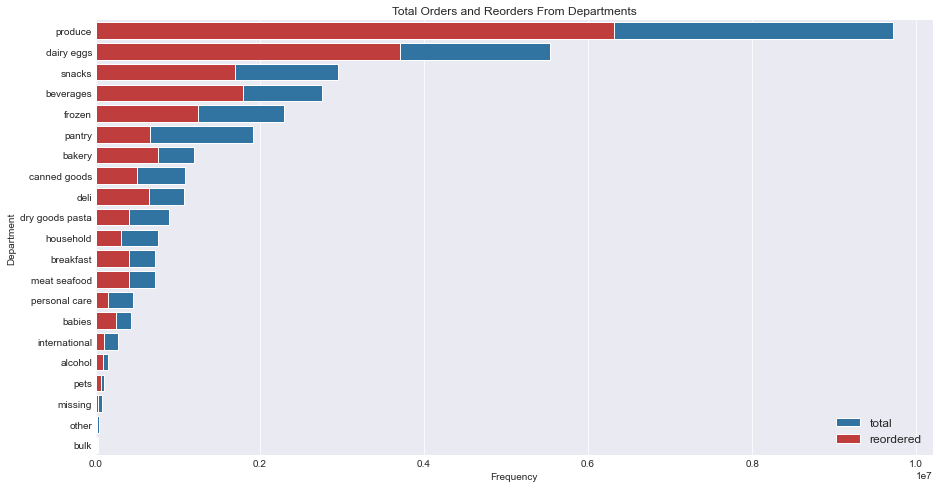

In [51]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.department, x = temp_df["total"], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.department, x = temp_df["reorders"], color=color[3], label = "reordered")
ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc = 4, prop={'size': 12})
ax.set_title("Total Orders and Reorders From Departments")
plt.show()

In [52]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()
temp_df.head()

,index,department,total,reorders,reorder_ratio
0,1,dairy eggs,5538593,3712173.0,0.670238
1,3,beverages,2755734,1801651.0,0.653783
2,0,produce,9712998,6317578.0,0.650425
3,6,bakery,1204281,756791.0,0.628417
4,8,deli,1076438,654616.0,0.608132


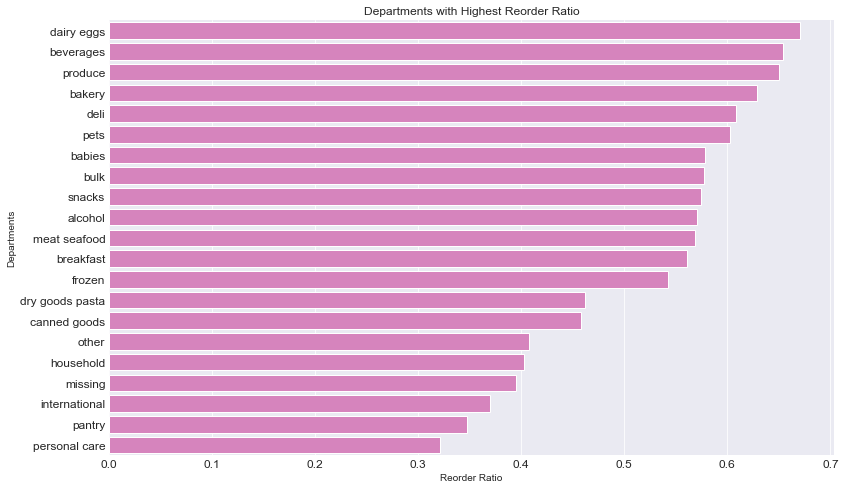

In [53]:
#Departments with Highest Reorder Ratio
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.department, x = temp_df.reorder_ratio, color=color[6])
ax.set_ylabel("Departments")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Departments with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

In [54]:
#Products
temp_df = order_products.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()
temp_df.head()

,product_name,total,reorders
0,Banana,483504,408325.0
1,Bag of Organic Bananas,388566,323784.0
2,Organic Strawberries,271042,210906.0
3,Organic Baby Spinach,247598,191568.0
4,Organic Hass Avocado,217838,173685.0


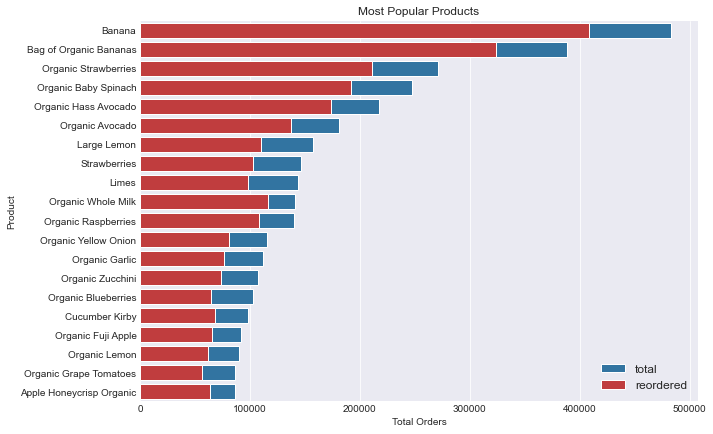

In [55]:
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorders[0:20], color=color[3], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [56]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df.sort_values("reorder_ratio", ascending=False).head(10)

,product_name,total,reorders,reorder_ratio
23663,Raw Veggie Wrappers,69,65.0,0.942029
21284,Serenity Ultimate Extrema Overnight Pads,89,83.0,0.932584
39968,Orange Energy Shots,13,12.0,0.923077
20195,Chocolate Love Bar,101,93.0,0.920792
30449,Soy Powder Infant Formula,35,32.0,0.914286
27810,Simply Sleep Nighttime Sleep Aid,45,41.0,0.911111
35085,"Energy Shot, Grape Flavor",22,20.0,0.909091
24860,Sparking Water,61,55.0,0.901639
31817,Russian River Valley Reserve Pinot Noir,30,27.0,0.900000
23719,Bars Peanut Butter,69,62.0,0.898551


In [ ]:
#Product Users
product_unique_users = order_products.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users.sort_values('total_users', ascending = False).head(10)

In [ ]:
product_unique_users = product_unique_users.merge(temp_df, on='product_name', how='left')
product_unique_users.sort_values("reorder_ratio", ascending=False).head(20)

In [ ]:
#Cumulative Sum of Unique Users Per Product
temp_df = product_unique_users.sort_values("total_users", ascending=False)
temp_df['cum_users'] = temp_df['total_users'].cumsum()
temp_df = temp_df.reset_index(drop=True)
temp_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x = temp_df.index, y=temp_df.cum_users)
ax.set_xlabel("Products", size = 9)
ax.set_ylabel("Cumulative Sum of Unique Users", size = 9)
ax.set_title("Cumulative Sum of Unique Users Per Product", size = 12)
plt.show()

In [ ]:
#Total Product Orders VS Total Unique Product Buyers
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(y = product_unique_users.total, x = product_unique_users.total_users)
ax.set_xlabel("Product Buyers", size = 9)
ax.set_ylabel("Number of Product Purchased", size = 9)
ax.set_title("Total Product Orders VS Total Unique Product Buyers", size = 12)
plt.show()

In [ ]:
#Reorder Percentage VS Total Orders
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = product_unique_users.total, y = product_unique_users.reorder_ratio, color = color[3])
ax.set_xlabel("Number of Products Purchased")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Orders")
plt.show()
#Check for 0 number of products purchased
temp_count=(temp_df['total']==0).sum()
print(temp_count)

In [ ]:
#Organic Vs Inorganic
product_unique_users['Organic'] = product_unique_users.product_name.str.contains("Organic")
product_unique_users.head()

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic').size().index, y = product_unique_users.groupby('Organic').size().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Total Products", size = 9)
ax.set_title("Total Organic and Inorganic products", size = 10)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic')['reorder_ratio'].mean().index, y = product_unique_users.groupby('Organic')['reorder_ratio'].mean().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Mean reorder ratio", size = 9)
ax.set_title("Mean Reorder Ratio of Organic/Inorganic Products", size = 10)
plt.show()

In [ ]:
#Add to Cart Order VS Reorder
temp_df = order_products.groupby('add_to_cart_order')['reordered'].mean().reset_index()
temp_df.head()
#change column name to mean reordered

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.lineplot(x=temp_df.add_to_cart_order, y=temp_df.reordered, lw = 1, marker='o')
ax.set_xlabel("Add to Cart Order")
ax.set_ylabel("Reorder Ratio")
ax.set_title("Add to Cart Order VS Reorder Ratio")
plt.show()

In [ ]:
#Most Popular Products on different days
temp_df = order_products.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df = temp_df.sort_values(['order_dow', 'counts'], ascending=[True, False])
temp_df = temp_df.groupby('order_dow').head(5).reset_index(drop = True)

In [ ]:
ax = sns.catplot(x="order_dow", y="counts", hue="product_name", data=temp_df, kind="bar", legend=False)
ax.add_legend(title="Product")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on different Days of Week", va="baseline", ha="center")
ax.savefig("Most Popular Products on Different Days of Week.png")

In [ ]:
orders['days_since_prior_order'].isna().value_counts(normalize = True)*100

## days_since_prior: days since the last order, capped at 30 (with NAs for order_number = 1)

In [ ]:
# Setting the correct indexes for the data sets

orders.set_index('order_id', inplace=True)
products.set_index('product_id', inplace=True)
aisle.set_index('aisle_id', inplace=True)
departments.set_index('department_id', inplace=True)
orders = orders.fillna(0) # Setting the NaNs to 0. i.e. sets the days since order to 0 for 1st orders

## Joining the tables together

In [ ]:
# Doing inner joins on the products and the departments and the aisle by the department_id and aisle_id respectively
product_comb = products.reset_index().set_index('department_id').join(departments, how="inner")
product_comb = product_comb.reset_index().set_index('aisle_id').join(aisle, how="inner")

In [ ]:
# Setting the index to 'product_id' and sorting it
product_comb = product_comb.reset_index().set_index('product_id')
product_comb.sort_index(axis=0, ascending=True, kind='quicksort', inplace=True)

In [ ]:
# Doing left joins on the products and the departments and the aisle by the department_id and aisle_id respectively
product_prior_comb = order_prior.set_index('product_id').join(product_comb, how="inner")
product_prior_comb.head()

In [ ]:
print(order_prior.head(), '\n\n')
print(product_prior_comb.head()) # added aisle id and dept id and name in order_prior table
print(order_prior.shape)

In [ ]:
product_train_comb = order_train.set_index('product_id').join(product_comb, how="inner")
print(product_prior_comb.shape, product_train_comb.shape)
product_train_comb.head(3)

In [ ]:
product_prior_comb.duplicated().value_counts(normalize = True)

In [ ]:
#orders_train_filter = (orders['eval_set']=='train')
#orders_test_filter = (orders['eval_set']=='test')
train_set = orders[orders['eval_set']=='train']
test_set = orders[orders['eval_set']=='test']


train_set.head()
#train_set.shape

In [ ]:
product_train_comb.head()
product_train_comb.set_index('order_id')
product_train_comb.head()

In [ ]:
order_test.head()
order_test = order_test.rename(columns={'userID': 'user_id', 'itemID': 'product_id'})

In [ ]:
product_test_comb = order_test.set_index('product_id').join(product_comb, how="inner")
print(product_test_comb.shape)
product_test_comb.head(3)

In [ ]:
product_train_comb.head()

In [ ]:
train_set.head()

In [ ]:
product_train_comb.head()

In [ ]:
product_train_comb.reset_index(inplace=True)
product_train_comb.set_index('order_id')

orders_product_train_comb = pd.merge(train_set,product_train_comb, on= ['order_id', 'user_id'],how="inner")
orders_product_train_comb.head()

product_test_comb.reset_index(inplace=True)
product_train_comb.set_index('order_id')

orders_product_test_comb = pd.merge(test_set,product_test_comb, on= ['order_id', 'user_id'],how="inner")
orders_product_test_comb.head()

In [ ]:
orders_product_train_comb.head()

In [ ]:
product_test_comb.head()

In [ ]:
product_test_comb.reset_index(inplace=True)

orders_product_test_comb = pd.merge(test_set,product_test_comb, on= ['order_id', 'user_id'],how="inner")
orders_product_test_comb.head()

In [ ]:
test_set.head(3)
train_set.head()

In [ ]:
product_test_comb.head()

In [ ]:
product_train_comb.head()

In [ ]:
frames = [product_train_comb,product_test_comb]

test_train_data_prod = pd.concat(frames)
test_train_data_prod.tail()

In [ ]:
print(product_train_comb.shape)
print(product_test_comb.shape)
print(test_train_data_prod.shape)

In [ ]:
order_train.head(40)

In [ ]:
train_set.head()

In [ ]:
train_set.shape

In [ ]:
test_train_final = pd.merge(train_set,test_train_data_prod, on= ['order_id', 'user_id'],how="inner")

In [ ]:
test_train_final.drop(columns = 'index', inplace = True)
test_train_final.head()

In [ ]:
print(test_train_final.shape)

In [ ]:
#keeping only train data
final_train_valid=test_train_final[(test_train_final.reordered == 1.0) | (test_train_final.reordered == 0.0)]
final_train_valid.head()
print(final_train_valid.shape)

In [ ]:
final_train_valid.head(10)

In [ ]:
orders.head()

In [ ]:
orders.reset_index(inplace = True)

In [ ]:
product_prior_comb = product_prior_comb.reset_index()

In [ ]:
product_prior_comb.head()

In [ ]:
def downcast_dtypes(df):
    '''
        Changes column types in the dataframe: 
                
                `float64` type to lowest possible float without data loss
                `int64`   type to lowest possible int wihtout data loss
    '''
    
    # Select columns to downcast
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols =   [c for c in df if df[c].dtype == "int64"]
    
    # Downcast
    df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')
    df[int_cols] = df[int_cols].apply(pd.to_numeric, downcast='integer')

    del float_cols
    del int_cols
    
    return df

In [ ]:
final_train_valid = downcast_dtypes(final_train_valid)
gc.collect()

In [ ]:
final_train_valid = final_train_valid.astype({"reordered": int})
final_train_valid.shape

In [ ]:
order_prior_final = pd.merge(product_prior_comb,
                             orders[['order_id','user_id','days_since_prior_order','order_number','order_dow','order_hour_of_day']],
                             on='order_id', how='left')
order_prior_final.head()

In [ ]:
# getting cum sum for each order id
order_prior_final=order_prior_final.sort_values(by=['user_id','order_id','product_id'])
order_prior_final['product_count_user'] = order_prior_final.groupby(['user_id', 'product_id'])['product_id'].cumsum()


order_prior_final.head(2)

## ADDING FEATURE OF PRODUCT COUNT / USER (i.e no. of times user has ordered a product)

In [106]:
order_prior_final['product_count_user'] = order_prior_final['product_count_user']/order_prior_final['product_id']
order_prior_final.head()

,product_id,order_id,add_to_cart_order,reordered,aisle_id,department_id,product_name,department,aisle,user_id,days_since_prior_order,order_number,order_dow,order_hour_of_day,product_count_user
107829,196,431534,1,1,77,7,Soda,beverages,soft drinks,1,28.0,5,4,15,1.0
6002108,10258,431534,3,1,117,19,Pistachios,snacks,nuts seeds dried fruit,1,28.0,5,4,15,1.0
6033575,10326,431534,5,0,24,4,Organic Fuji Apples,produce,fresh fruits,1,28.0,5,4,15,1.0
7188223,12427,431534,2,1,23,19,Original Beef Jerky,snacks,popcorn jerky,1,28.0,5,4,15,1.0
7596898,13176,431534,8,1,24,4,Bag of Organic Bananas,produce,fresh fruits,1,28.0,5,4,15,1.0


In [107]:
order_prior_final.head(3)

,product_id,order_id,add_to_cart_order,reordered,aisle_id,department_id,product_name,department,aisle,user_id,days_since_prior_order,order_number,order_dow,order_hour_of_day,product_count_user
107829,196,431534,1,1,77,7,Soda,beverages,soft drinks,1,28.0,5,4,15,1.0
6002108,10258,431534,3,1,117,19,Pistachios,snacks,nuts seeds dried fruit,1,28.0,5,4,15,1.0
6033575,10326,431534,5,0,24,4,Organic Fuji Apples,produce,fresh fruits,1,28.0,5,4,15,1.0


In [108]:
order_prior_final_1 = order_prior_final[['user_id','product_id','product_count_user']]
#order_prior_final_1.head(50)

In [109]:
max_product_count = pd.DataFrame(order_prior_final_1.groupby(['user_id','product_id'])['product_count_user'].max())
max_product_count.head(5)

product_count_user
user_id product_id                    
1       196                       10.0
        10258                      9.0
        10326                      1.0
        12427                     10.0
        13032                      3.0

In [110]:
max_product_count.head()

product_count_user
user_id product_id                    
1       196                       10.0
        10258                      9.0
        10326                      1.0
        12427                     10.0
        13032                      3.0

In [111]:
max_product_count.reset_index(inplace=True)
max_product_count.head(2)

,user_id,product_id,product_count_user
0,1,196,10.0
1,1,10258,9.0


In [112]:
test_train_final = pd.merge(test_train_final,max_product_count, on=['user_id', 'product_id'], how='left')
test_train_final.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,ID,aisle_id,department_id,product_name,department,aisle,product_count_user
0,1187899,1,train,11,4,8,14.0,196,1,1.0,10,77,7,Soda,beverages,soft drinks,10.0
1,1187899,1,train,11,4,8,14.0,10258,6,1.0,19,117,19,Pistachios,snacks,nuts seeds dried fruit,9.0
2,1187899,1,train,11,4,8,14.0,25133,2,1.0,9,21,16,Organic String Cheese,dairy eggs,packaged cheese,8.0
3,1187899,1,train,11,4,8,14.0,26405,4,1.0,119001,54,17,XL Pick-A-Size Paper Towel Rolls,household,paper goods,2.0
4,1187899,1,train,11,4,8,14.0,27845,9,0.0,14,84,16,Organic Whole Milk,dairy eggs,milk,NaN


In [113]:
#keeping only train data
final_train_valid=test_train_final[(test_train_final.reordered == 1.0) | (test_train_final.reordered == 0.0)]
final_train_valid.head()

final_train_valid.loc[(final_train_valid['product_count_user']>=1), 'product_count_user']= 1
final_train_valid.loc[(final_train_valid['product_count_user']!=1), 'product_count_user']= 0

C:\Users\Devansh_21\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Devansh_21\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [114]:
final_train_valid['product_count_user'].value_counts()

1.0    477908
0.0    310003
Name: product_count_user, dtype: int64

In [115]:
gc.collect()

120

## Model Training

In [116]:
# getting count of products in each order
count=final_train_valid.groupby(['user_id', 'order_id'])['ID'].count().rename('product_count')
final_train_valid = pd.merge(final_train_valid, count, on=['user_id', 'order_id'], how='left')
final_train_valid.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,ID,aisle_id,department_id,product_name,department,aisle,product_count_user,product_count
0,1187899,1,train,11,4,8,14.0,196,1,1.0,10,77,7,Soda,beverages,soft drinks,1.0,8
1,1187899,1,train,11,4,8,14.0,10258,6,1.0,19,117,19,Pistachios,snacks,nuts seeds dried fruit,1.0,8
2,1187899,1,train,11,4,8,14.0,25133,2,1.0,9,21,16,Organic String Cheese,dairy eggs,packaged cheese,1.0,8
3,1187899,1,train,11,4,8,14.0,26405,4,1.0,119001,54,17,XL Pick-A-Size Paper Towel Rolls,household,paper goods,1.0,8
4,1187899,1,train,11,4,8,14.0,27845,9,0.0,14,84,16,Organic Whole Milk,dairy eggs,milk,0.0,8


In [117]:
# getting cum sum for each order id
final_train_valid['product_running_count'] = final_train_valid.groupby(['user_id', 'order_id'])['product_count'].cumsum()
final_train_valid.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,ID,aisle_id,department_id,product_name,department,aisle,product_count_user,product_count,product_running_count
0,1187899,1,train,11,4,8,14.0,196,1,1.0,10,77,7,Soda,beverages,soft drinks,1.0,8,8
1,1187899,1,train,11,4,8,14.0,10258,6,1.0,19,117,19,Pistachios,snacks,nuts seeds dried fruit,1.0,8,16
2,1187899,1,train,11,4,8,14.0,25133,2,1.0,9,21,16,Organic String Cheese,dairy eggs,packaged cheese,1.0,8,24
3,1187899,1,train,11,4,8,14.0,26405,4,1.0,119001,54,17,XL Pick-A-Size Paper Towel Rolls,household,paper goods,1.0,8,32
4,1187899,1,train,11,4,8,14.0,27845,9,0.0,14,84,16,Organic Whole Milk,dairy eggs,milk,0.0,8,40


In [118]:
# getting running count for each order
final_train_valid['product_running_count'] = final_train_valid['product_running_count'] / final_train_valid['product_count']
final_train_valid.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,ID,aisle_id,department_id,product_name,department,aisle,product_count_user,product_count,product_running_count
0,1187899,1,train,11,4,8,14.0,196,1,1.0,10,77,7,Soda,beverages,soft drinks,1.0,8,1.0
1,1187899,1,train,11,4,8,14.0,10258,6,1.0,19,117,19,Pistachios,snacks,nuts seeds dried fruit,1.0,8,2.0
2,1187899,1,train,11,4,8,14.0,25133,2,1.0,9,21,16,Organic String Cheese,dairy eggs,packaged cheese,1.0,8,3.0
3,1187899,1,train,11,4,8,14.0,26405,4,1.0,119001,54,17,XL Pick-A-Size Paper Towel Rolls,household,paper goods,1.0,8,4.0
4,1187899,1,train,11,4,8,14.0,27845,9,0.0,14,84,16,Organic Whole Milk,dairy eggs,milk,0.0,8,5.0


In [119]:
# getting percentage of rows
final_train_valid['product_count_percent'] = final_train_valid['product_running_count'] / final_train_valid['product_count']
final_train_valid.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,ID,aisle_id,department_id,product_name,department,aisle,product_count_user,product_count,product_running_count,product_count_percent
0,1187899,1,train,11,4,8,14.0,196,1,1.0,10,77,7,Soda,beverages,soft drinks,1.0,8,1.0,0.125000
1,1187899,1,train,11,4,8,14.0,10258,6,1.0,19,117,19,Pistachios,snacks,nuts seeds dried fruit,1.0,8,2.0,0.250000
2,1187899,1,train,11,4,8,14.0,25133,2,1.0,9,21,16,Organic String Cheese,dairy eggs,packaged cheese,1.0,8,3.0,0.375000
3,1187899,1,train,11,4,8,14.0,26405,4,1.0,119001,54,17,XL Pick-A-Size Paper Towel Rolls,household,paper goods,1.0,8,4.0,0.500000
4,1187899,1,train,11,4,8,14.0,27845,9,0.0,14,84,16,Organic Whole Milk,dairy eggs,milk,0.0,8,5.0,0.625000
5,1187899,1,train,11,4,8,14.0,38928,3,1.0,2,120,16,0% Greek Strained Yogurt,dairy eggs,yogurt,1.0,8,6.0,0.750000
6,1187899,1,train,11,4,8,14.0,39657,5,1.0,21,45,19,Milk Chocolate Almonds,snacks,candy chocolate,1.0,8,7.0,0.875000
7,1187899,1,train,11,4,8,14.0,49235,10,1.0,12,53,16,Organic Half & Half,dairy eggs,cream,1.0,8,8.0,1.000000
8,1492625,2,train,15,1,11,30.0,1757,30,0.0,23,69,15,Organic Cashew Carrot Ginger Soup,canned goods,soup broth bouillon,0.0,23,1.0,0.043478
9,1492625,2,train,15,1,11,30.0,2361,26,0.0,31,37,1,Mint Chip,frozen,ice cream ice,0.0,23,2.0,0.086957


In [120]:
final_train_valid['product_count_user'].fillna(0,inplace = True)

In [121]:
final_train_valid.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,ID,aisle_id,department_id,product_name,department,aisle,product_count_user,product_count,product_running_count,product_count_percent
0,1187899,1,train,11,4,8,14.0,196,1,1.0,10,77,7,Soda,beverages,soft drinks,1.0,8,1.0,0.125000
1,1187899,1,train,11,4,8,14.0,10258,6,1.0,19,117,19,Pistachios,snacks,nuts seeds dried fruit,1.0,8,2.0,0.250000
2,1187899,1,train,11,4,8,14.0,25133,2,1.0,9,21,16,Organic String Cheese,dairy eggs,packaged cheese,1.0,8,3.0,0.375000
3,1187899,1,train,11,4,8,14.0,26405,4,1.0,119001,54,17,XL Pick-A-Size Paper Towel Rolls,household,paper goods,1.0,8,4.0,0.500000
4,1187899,1,train,11,4,8,14.0,27845,9,0.0,14,84,16,Organic Whole Milk,dairy eggs,milk,0.0,8,5.0,0.625000
5,1187899,1,train,11,4,8,14.0,38928,3,1.0,2,120,16,0% Greek Strained Yogurt,dairy eggs,yogurt,1.0,8,6.0,0.750000
6,1187899,1,train,11,4,8,14.0,39657,5,1.0,21,45,19,Milk Chocolate Almonds,snacks,candy chocolate,1.0,8,7.0,0.875000
7,1187899,1,train,11,4,8,14.0,49235,10,1.0,12,53,16,Organic Half & Half,dairy eggs,cream,1.0,8,8.0,1.000000
8,1492625,2,train,15,1,11,30.0,1757,30,0.0,23,69,15,Organic Cashew Carrot Ginger Soup,canned goods,soup broth bouillon,0.0,23,1.0,0.043478
9,1492625,2,train,15,1,11,30.0,2361,26,0.0,31,37,1,Mint Chip,frozen,ice cream ice,0.0,23,2.0,0.086957


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,ID,aisle_id,department_id,product_count_user,product_count,product_running_count,product_count_percent
order_id,1.00,-0.01,0.00,-0.00,-0.00,0.00,0.00,-0.01,0.01,-0.01,0.00,0.00,0.01,-0.00,-0.00,-0.00
user_id,-0.01,1.00,-0.00,-0.01,0.01,0.01,-0.00,0.01,-0.00,0.92,-0.00,-0.00,-0.00,0.00,0.00,0.00
order_number,0.00,-0.00,1.00,0.02,-0.03,-0.40,-0.00,0.01,0.22,-0.00,-0.00,-0.00,0.22,0.02,0.01,-0.01
order_dow,-0.00,-0.01,0.02,1.00,0.01,-0.03,-0.00,-0.02,-0.01,-0.01,-0.00,0.01,-0.01,-0.03,-0.02,0.01
order_hour_of_day,-0.00,0.01,-0.03,0.01,1.00,0.00,0.00,-0.01,-0.02,0.01,-0.00,-0.01,-0.02,-0.01,-0.01,-0.00
days_since_prior_order,0.00,0.01,-0.40,-0.03,0.00,1.00,0.00,0.02,-0.16,0.01,0.01,0.01,-0.16,0.02,0.02,-0.00
product_id,0.00,-0.00,-0.00,-0.00,0.00,0.00,1.00,0.00,0.01,-0.00,-0.00,-0.03,0.01,0.01,0.59,0.87
add_to_cart_order,-0.01,0.01,0.01,-0.02,-0.01,0.02,0.00,1.00,-0.15,0.00,0.01,0.03,-0.15,0.66,0.44,-0.09
reordered,0.01,-0.00,0.22,-0.01,-0.02,-0.16,0.01,-0.15,1.00,-0.00,0.00,-0.05,1.00,0.02,0.02,0.01
ID,-0.01,0.92,-0.00,-0.01,0.01,0.01,-0.00,0.00,-0.00,1.00,0.00,0.00,-0.00,-0.00,-0.00,0.00


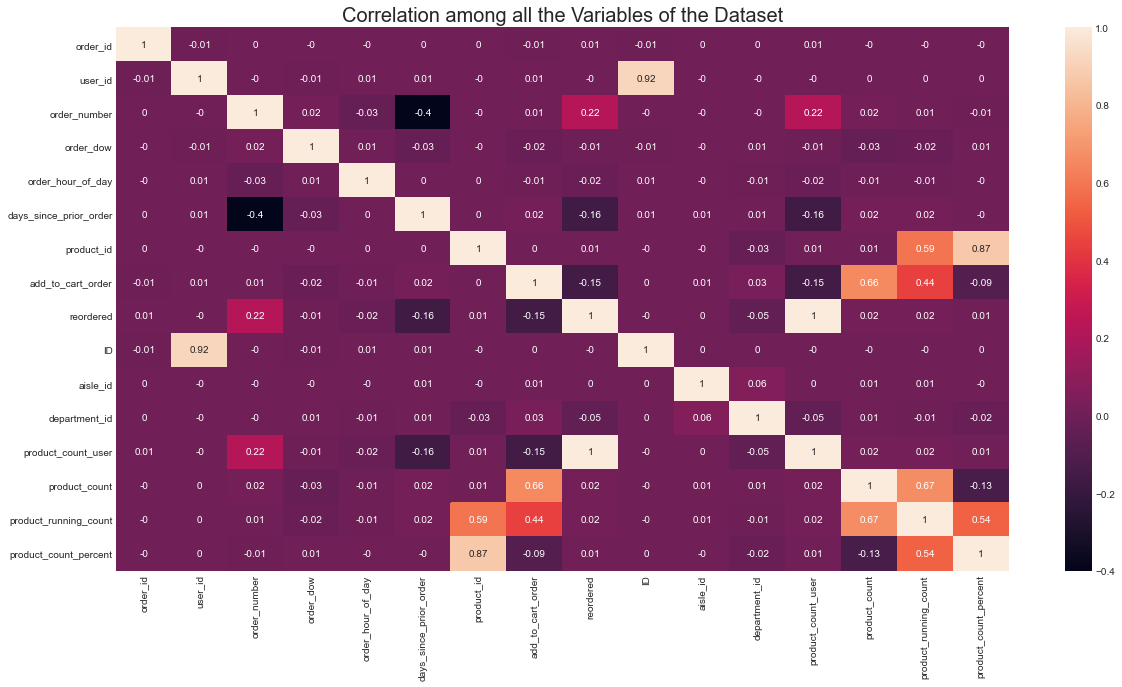

In [122]:
#Correlation among all the Variables of the Dataset
cor=final_train_valid.corr().round(2)
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

In [123]:
#Training Data
tot_train_data=final_train_valid[(final_train_valid.product_count_percent <= 0.7)]
tot_train_data.head(50)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,ID,aisle_id,department_id,product_name,department,aisle,product_count_user,product_count,product_running_count,product_count_percent
0,1187899,1,train,11,4,8,14.0,196,1,1.0,10,77,7,Soda,beverages,soft drinks,1.0,8,1.0,0.125000
1,1187899,1,train,11,4,8,14.0,10258,6,1.0,19,117,19,Pistachios,snacks,nuts seeds dried fruit,1.0,8,2.0,0.250000
2,1187899,1,train,11,4,8,14.0,25133,2,1.0,9,21,16,Organic String Cheese,dairy eggs,packaged cheese,1.0,8,3.0,0.375000
3,1187899,1,train,11,4,8,14.0,26405,4,1.0,119001,54,17,XL Pick-A-Size Paper Towel Rolls,household,paper goods,1.0,8,4.0,0.500000
4,1187899,1,train,11,4,8,14.0,27845,9,0.0,14,84,16,Organic Whole Milk,dairy eggs,milk,0.0,8,5.0,0.625000
8,1492625,2,train,15,1,11,30.0,1757,30,0.0,23,69,15,Organic Cashew Carrot Ginger Soup,canned goods,soup broth bouillon,0.0,23,1.0,0.043478
9,1492625,2,train,15,1,11,30.0,2361,26,0.0,31,37,1,Mint Chip,frozen,ice cream ice,0.0,23,2.0,0.086957
10,1492625,2,train,15,1,11,30.0,5699,22,0.0,39,38,1,Gluten Free Mushroom Risotto Bowl,frozen,frozen meals,0.0,23,3.0,0.130435
11,1492625,2,train,15,1,11,30.0,11913,28,0.0,27,117,19,Shelled Pistachios,snacks,nuts seeds dried fruit,0.0,23,4.0,0.173913
12,1492625,2,train,15,1,11,30.0,12007,15,0.0,54,80,11,Organic All Day Fresh Deodorant Lavender,personal care,deodorants,0.0,23,5.0,0.217391


In [124]:
#Validation data set
tot_valid=final_train_valid[(final_train_valid.product_count_percent > 0.7)]
tot_valid.head(50)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,ID,aisle_id,department_id,product_name,department,aisle,product_count_user,product_count,product_running_count,product_count_percent
5,1187899,1,train,11,4,8,14.0,38928,3,1.0,2,120,16,0% Greek Strained Yogurt,dairy eggs,yogurt,1.0,8,6.0,0.750000
6,1187899,1,train,11,4,8,14.0,39657,5,1.0,21,45,19,Milk Chocolate Almonds,snacks,candy chocolate,1.0,8,7.0,0.875000
7,1187899,1,train,11,4,8,14.0,49235,10,1.0,12,53,16,Organic Half & Half,dairy eggs,cream,1.0,8,8.0,1.000000
24,1492625,2,train,15,1,11,30.0,38547,13,0.0,58,46,19,Bubblegum Flavor Natural Chewing Gum,snacks,mint gum,0.0,23,17.0,0.739130
25,1492625,2,train,15,1,11,30.0,41787,5,1.0,75,24,4,Bartlett Pears,produce,fresh fruits,1.0,23,18.0,0.782609
26,1492625,2,train,15,1,11,30.0,45066,9,1.0,67,24,4,Honeycrisp Apple,produce,fresh fruits,1.0,23,19.0,0.826087
27,1492625,2,train,15,1,11,30.0,45613,18,1.0,48,38,1,Pad Thai,frozen,frozen meals,1.0,23,20.0,0.869565
28,1492625,2,train,15,1,11,30.0,45645,29,0.0,25,3,19,Dark Chocolate Nuts & Sea Salt Bars,snacks,energy granola bars,0.0,23,21.0,0.913043
29,1492625,2,train,15,1,11,30.0,48523,25,0.0,33,37,1,Birthday Cake Light Ice Cream,frozen,ice cream ice,0.0,23,22.0,0.956522
30,1492625,2,train,15,1,11,30.0,48821,27,0.0,29,37,1,Pistachio Ice Cream,frozen,ice cream ice,0.0,23,23.0,1.000000


In [125]:
tot_train_data.shape

(504120, 20)

In [126]:
tot_valid.shape

(283791, 20)

In [127]:
X_train_data=tot_train_data.drop(columns=['eval_set', 'order_id','user_id','ID','product_name','department','aisle','product_count','product_running_count','product_count_percent','reordered'], axis=1)


In [128]:
X_train_data.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,aisle_id,department_id,product_count_user
0,11,4,8,14.0,196,1,77,7,1.0
1,11,4,8,14.0,10258,6,117,19,1.0
2,11,4,8,14.0,25133,2,21,16,1.0
3,11,4,8,14.0,26405,4,54,17,1.0
4,11,4,8,14.0,27845,9,84,16,0.0


In [129]:
Y_train_data=tot_train_data['reordered']

In [130]:
Y_train_data.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: reordered, dtype: float64

In [131]:
X_val_data=tot_valid.drop(columns=['eval_set', 'order_id','user_id','ID','product_name','department','aisle','product_count','product_running_count','product_count_percent','reordered'], axis=1)

In [132]:
Y_val_data=tot_valid['reordered']

### Gaussian

In [133]:
gnb=GaussianNB()
gnb.fit(X_train_data,Y_train_data)

GaussianNB()

In [134]:
pr=gauss_prediction=gnb.predict(X_val_data)

In [135]:
gauss_score=accuracy_score(Y_val_data,pr)

In [136]:
gauss_score

0.9923218142929128

### Logistic Regression

In [137]:
lr=LogisticRegression(max_iter=2000)
lr.fit(X_train_data,Y_train_data)

LogisticRegression(max_iter=2000)

In [138]:
lr_prediction=lr.predict(X_val_data)

In [139]:
lr_score=accuracy_score(Y_val_data,lr_prediction)
lr_score

1.0

In [140]:
randomforest = RandomForestClassifier(random_state = 1)
randomforest.fit(X_train_data,Y_train_data)

RandomForestClassifier(random_state=1)

In [141]:
randomforest_prediction=randomforest.predict(X_val_data)

In [142]:
randomforest_score=accuracy_score(Y_val_data,randomforest_prediction)
randomforest_score

1.0

In [143]:
XGBoost = XGBClassifier(random_state = 1)
XGBoost.fit(X_train_data,Y_train_data)

C:\Users\Devansh_21\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:09:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [144]:
XGBoost_prediction=XGBoost.predict(X_val_data)

In [145]:
XGBoost_score=accuracy_score(Y_val_data,XGBoost_prediction)
XGBoost_score

1.0

In [146]:
decision_tree = tree.DecisionTreeClassifier(random_state = 1)
decision_tree.fit(X_train_data,Y_train_data)

DecisionTreeClassifier(random_state=1)

In [147]:
decision_tree_prediction=decision_tree.predict(X_val_data)

In [148]:
decision_tree_score=accuracy_score(Y_val_data,decision_tree_prediction)
decision_tree_score

1.0

In [230]:
lgtraindata = lgb.Dataset(tot_train_data.drop(['eval_set', 'order_id','user_id','ID','product_name','department','aisle','product_count','product_running_count','product_count_percent','reordered'], axis=1).to_numpy(), label=tot_train_data['reordered'].to_numpy())
lgvaldata = lgb.Dataset(tot_valid.drop(['eval_set', 'order_id','user_id','ID','product_name','department','aisle','product_count','product_running_count','product_count_percent','reordered'], axis=1).to_numpy(), label=tot_valid['reordered'].to_numpy())

In [231]:
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

def run_lgb(depth, leaves):
    params = {
        'objective' : 'binary',
        'boosting_type':'gbdt',
        'num_leaves' : leaves,
        'learning_rate' : 0.02,
        'feature_fraction' : 0.8,
        'bagging_seed' : 42,
        'seed': 42,
        'max_depth': depth, 
        'verbose': 0, 
        'num_boost_round':5000, 
        'early_stopping_rounds':200, 
    }

    evals_result = {}
    model = lgb.train(params, lgtraindata, num_boost_round=params['num_boost_round'], 
                      valid_sets=[lgtraindata, lgvaldata], 
                      early_stopping_rounds=params['early_stopping_rounds'], 
                      verbose_eval=150, 
                      evals_result=evals_result, feval=lgb_f1_score)
    
    return model, evals_result

In [232]:
# running model for depth 5 (and leaves 10)
lgb_5_10, evals_result_5_10 = run_lgb(5,10)

C:\Users\Devansh_21\Anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Devansh_21\Anaconda3\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[150]	training's binary_logloss: 0.0440844	training's f1: 1	valid_1's binary_logloss: 0.0441713	valid_1's f1: 1
Early stopping, best iteration is:
[14]	training's binary_logloss: 0.487857	training's f1: 1	valid_1's binary_logloss: 0.487981	valid_1's f1: 1


In [242]:
# re-run model without the validation data

def run_lgb_nov(depth, leaves):
    params = {
        'objective' : 'binary',
        'boosting_type':'gbdt',
        'num_leaves' : leaves,
        'learning_rate' : 0.02,
        'feature_fraction' : 0.8,
        'bagging_seed' : 42,
        'seed': 42,
        'max_depth': depth, 
        'verbose': 0, 
        'num_boost_round':5000
    }

    evals_result = {}
    model = lgb.train(params, lgtraindata_full, num_boost_round=params['num_boost_round'])
    
    return model

In [243]:
# full training data
lgtraindata_full = lgb.Dataset(final_train_valid.drop(['eval_set', 'order_id','user_id','ID','product_name','department','aisle','product_count','product_running_count','product_count_percent','reordered'], axis=1).to_numpy(), label=final_train_valid['reordered'].to_numpy())

In [244]:
# running full model for depth 5 (and leaves 10)
lgb_5_10_full = run_lgb_nov(5,10)

C:\Users\Devansh_21\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

In [253]:
# readying test data
final_test_valid_1 = test_train_final[(test_train_final.reordered != 1.0) & (test_train_final.reordered != 0.0)]
print(final_test_valid_1.shape)

(260664, 17)


In [254]:
final_test_valid_1['product_count_user'].fillna(0,inplace = True)

C:\Users\Devansh_21\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [255]:
final_test_valid=final_test_valid_1.drop(['eval_set', 'order_id','user_id','ID','product_name','department','aisle','reordered'], axis=1)

In [259]:
final_test_valid.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,aisle_id,department_id,product_count_user
8,11,4,8,14.0,13032,7,121,14,3.0
9,11,4,8,14.0,26088,8,23,19,2.0
10,11,4,8,14.0,46149,11,77,7,3.0
34,15,1,11,30.0,5450,11,24,4,1.0
35,15,1,11,30.0,7963,2,58,1,1.0


In [260]:
final_test_valid = downcast_dtypes(final_test_valid)
gc.collect()

20154

In [261]:
final_test_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260664 entries, 8 to 1048574
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_number            260664 non-null  int8   
 1   order_dow               260664 non-null  int8   
 2   order_hour_of_day       260664 non-null  int8   
 3   days_since_prior_order  260664 non-null  float32
 4   product_id              260664 non-null  int32  
 5   add_to_cart_order       260664 non-null  int8   
 6   aisle_id                260664 non-null  int16  
 7   department_id           260664 non-null  int8   
 8   product_count_user      260664 non-null  float32
dtypes: float32(2), int16(1), int32(1), int8(5)
memory usage: 6.7 MB


In [262]:
# Making predictions
y_test = lgb_5_10_full.predict(final_test_valid.to_numpy())

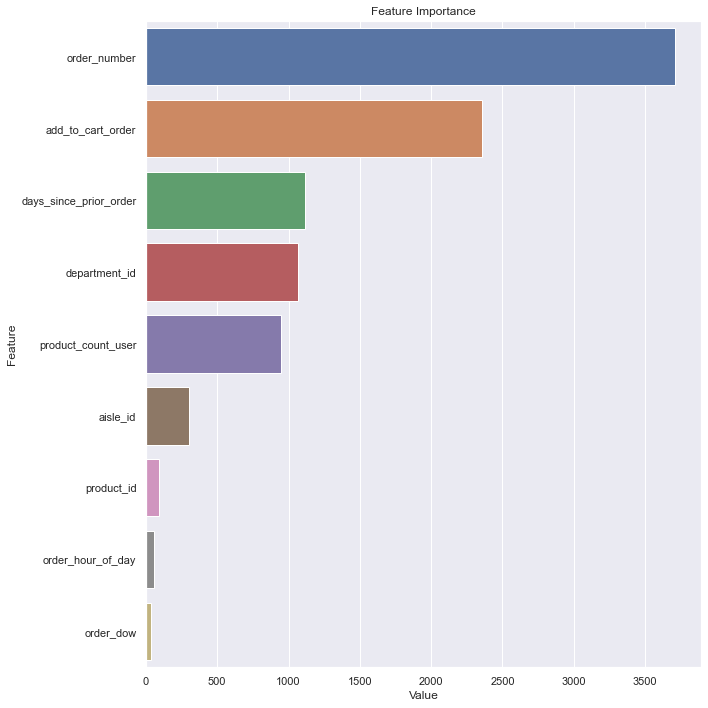

In [264]:
# plot feature importance
feature_imp = pd.DataFrame({'Value':lgb_5_10_full.feature_importance(),'Feature':final_test_valid.columns})
plt.figure(figsize=(10, 10))
sns.set(font_scale = 1)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:30])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [265]:
# converting predictions to pandas dataframe
y_test_pd = pd.DataFrame({'reordered': y_test[:,]})
y_test_pd.head()

,reordered
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


### Adding Columns Reorder Ratio for Aisle ID

In [184]:
temp_df=final_train_valid.groupby("aisle_id")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()
temp_df.head()

,aisle_id,total,reorders
0,24,86753,64393.0
1,83,85394,52281.0
2,123,44767,29711.0
3,120,31707,21984.0
4,21,23529,14172.0


In [185]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()
temp_df.head()

,index,aisle_id,total,reorders,reorder_ratio
0,6,84,19008,15171.0,0.798138
1,5,115,21210,15825.0,0.746110
2,0,24,86753,64393.0,0.742257
3,13,86,11511,8454.0,0.734428
4,24,32,7708,5585.0,0.724572


In [187]:
final_train_valid_join = final_train_valid.merge(temp_df,on='aisle_id', how='left')
final_train_valid_join.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,department,aisle,product_count_user,product_count,product_running_count,product_count_percent,index,total,reorders,reorder_ratio
0,1187899,1,train,11,4,8,14.0,196,1,1.0,...,beverages,soft drinks,1.0,8,1.0,0.125,18,9328,6167.0,0.661128
1,1187899,1,train,11,4,8,14.0,10258,6,1.0,...,snacks,nuts seeds dried fruit,1.0,8,2.0,0.250,32,6985,3674.0,0.525984
2,1187899,1,train,11,4,8,14.0,25133,2,1.0,...,dairy eggs,packaged cheese,1.0,8,3.0,0.375,4,23529,14172.0,0.602321
3,1187899,1,train,11,4,8,14.0,26405,4,1.0,...,household,paper goods,1.0,8,4.0,0.500,28,7215,4001.0,0.554539
4,1187899,1,train,11,4,8,14.0,27845,9,0.0,...,dairy eggs,milk,0.0,8,5.0,0.625,6,19008,15171.0,0.798138


In [189]:
#Training Data
tot_train_data_1=final_train_valid_join[(final_train_valid_join.product_count_percent <= 0.7)]
tot_train_data_1.head(50)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,department,aisle,product_count_user,product_count,product_running_count,product_count_percent,index,total,reorders,reorder_ratio
0,1187899,1,train,11,4,8,14.0,196,1,1.0,...,beverages,soft drinks,1.0,8,1.0,0.125000,18,9328,6167.0,0.661128
1,1187899,1,train,11,4,8,14.0,10258,6,1.0,...,snacks,nuts seeds dried fruit,1.0,8,2.0,0.250000,32,6985,3674.0,0.525984
2,1187899,1,train,11,4,8,14.0,25133,2,1.0,...,dairy eggs,packaged cheese,1.0,8,3.0,0.375000,4,23529,14172.0,0.602321
3,1187899,1,train,11,4,8,14.0,26405,4,1.0,...,household,paper goods,1.0,8,4.0,0.500000,28,7215,4001.0,0.554539
4,1187899,1,train,11,4,8,14.0,27845,9,0.0,...,dairy eggs,milk,0.0,8,5.0,0.625000,6,19008,15171.0,0.798138
8,1492625,2,train,15,1,11,30.0,1757,30,0.0,...,canned goods,soup broth bouillon,0.0,23,1.0,0.043478,22,8375,3783.0,0.451701
9,1492625,2,train,15,1,11,30.0,2361,26,0.0,...,frozen,ice cream ice,0.0,23,2.0,0.086957,12,12790,6179.0,0.483112
10,1492625,2,train,15,1,11,30.0,5699,22,0.0,...,frozen,frozen meals,0.0,23,3.0,0.130435,15,10349,6357.0,0.614262
11,1492625,2,train,15,1,11,30.0,11913,28,0.0,...,snacks,nuts seeds dried fruit,0.0,23,4.0,0.173913,32,6985,3674.0,0.525984
12,1492625,2,train,15,1,11,30.0,12007,15,0.0,...,personal care,deodorants,0.0,23,5.0,0.217391,117,488,135.0,0.276639


In [190]:
#Validation data set
tot_valid_1=final_train_valid_join[(final_train_valid_join.product_count_percent > 0.7)]
tot_valid_1.head(50)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,department,aisle,product_count_user,product_count,product_running_count,product_count_percent,index,total,reorders,reorder_ratio
5,1187899,1,train,11,4,8,14.0,38928,3,1.0,...,dairy eggs,yogurt,1.0,8,6.0,0.750000,3,31707,21984.0,0.693348
6,1187899,1,train,11,4,8,14.0,39657,5,1.0,...,snacks,candy chocolate,1.0,8,7.0,0.875000,34,6611,3835.0,0.580094
7,1187899,1,train,11,4,8,14.0,49235,10,1.0,...,dairy eggs,cream,1.0,8,8.0,1.000000,29,7171,4984.0,0.695022
24,1492625,2,train,15,1,11,30.0,38547,13,0.0,...,snacks,mint gum,0.0,23,17.0,0.739130,112,541,329.0,0.608133
25,1492625,2,train,15,1,11,30.0,41787,5,1.0,...,produce,fresh fruits,1.0,23,18.0,0.782609,0,86753,64393.0,0.742257
26,1492625,2,train,15,1,11,30.0,45066,9,1.0,...,produce,fresh fruits,1.0,23,19.0,0.826087,0,86753,64393.0,0.742257
27,1492625,2,train,15,1,11,30.0,45613,18,1.0,...,frozen,frozen meals,1.0,23,20.0,0.869565,15,10349,6357.0,0.614262
28,1492625,2,train,15,1,11,30.0,45645,29,0.0,...,snacks,energy granola bars,0.0,23,21.0,0.913043,16,9882,6042.0,0.611415
29,1492625,2,train,15,1,11,30.0,48523,25,0.0,...,frozen,ice cream ice,0.0,23,22.0,0.956522,12,12790,6179.0,0.483112
30,1492625,2,train,15,1,11,30.0,48821,27,0.0,...,frozen,ice cream ice,0.0,23,23.0,1.000000,12,12790,6179.0,0.483112


In [191]:
X_train_data_1=tot_train_data_1.drop(columns=['eval_set', 'order_id','user_id','ID','product_name','department','aisle','product_count','product_running_count','product_count_percent','reordered','index','total','product_count_user'], axis=1)

In [192]:
Y_train_data_1=tot_train_data_1['reordered']

In [193]:
X_val_data_1=tot_valid_1.drop(columns=['eval_set', 'order_id','user_id','ID','product_name','department','aisle','product_count','product_running_count','product_count_percent','reordered','index','total','product_count_user'], axis=1)

In [194]:
Y_val_data_1=tot_valid_1['reordered']

In [205]:
lr=LogisticRegression(max_iter=2000)
lr.fit(X_train_data_1,Y_train_data_1)

LogisticRegression(max_iter=2000)

In [206]:
lr_prediction=lr.predict(X_val_data_1)

In [207]:
lr_score=f1_score(Y_val_data_1,lr_prediction)
lr_score

0.7575284212065457

## One Hot Encoding Categorical features

In [160]:
X_train_data_categoric = X_train_data[['order_dow','order_hour_of_day']]
X_train_data_categoric.head()

,order_dow,order_hour_of_day
0,4,8
1,4,8
2,4,8
3,4,8
4,4,8


In [161]:
categorical_cols = X_train_data_categoric.columns.tolist()
categorical_cols

['order_dow', 'order_hour_of_day']

In [162]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [163]:
encoder.fit(X_train_data[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [164]:
encoder.categories

'auto'

In [165]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['order_dow_0', 'order_dow_1', 'order_dow_2', 'order_dow_3', 'order_dow_4', 'order_dow_5', 'order_dow_6', 'order_hour_of_day_0', 'order_hour_of_day_1', 'order_hour_of_day_2', 'order_hour_of_day_3', 'order_hour_of_day_4', 'order_hour_of_day_5', 'order_hour_of_day_6', 'order_hour_of_day_7', 'order_hour_of_day_8', 'order_hour_of_day_9', 'order_hour_of_day_10', 'order_hour_of_day_11', 'order_hour_of_day_12', 'order_hour_of_day_13', 'order_hour_of_day_14', 'order_hour_of_day_15', 'order_hour_of_day_16', 'order_hour_of_day_17', 'order_hour_of_day_18', 'order_hour_of_day_19', 'order_hour_of_day_20', 'order_hour_of_day_21', 'order_hour_of_day_22', 'order_hour_of_day_23']


In [166]:
X_train_data[encoded_cols] = encoder.transform(X_train_data[categorical_cols])
X_val_data[encoded_cols] = encoder.transform(X_val_data[categorical_cols])

In [172]:
X_train_data.drop(columns = 'product_count_user', inplace = True)
X_train_data

,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,aisle_id,department_id,order_dow_0,order_dow_1,...,order_hour_of_day_14,order_hour_of_day_15,order_hour_of_day_16,order_hour_of_day_17,order_hour_of_day_18,order_hour_of_day_19,order_hour_of_day_20,order_hour_of_day_21,order_hour_of_day_22,order_hour_of_day_23
0,11,4,8,14.0,196,1,77,7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11,4,8,14.0,10258,6,117,19,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11,4,8,14.0,25133,2,21,16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,4,8,14.0,26405,4,54,17,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,4,8,14.0,27845,9,84,16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787900,12,3,15,14.0,18526,10,69,15,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787901,12,3,15,14.0,18599,5,4,9,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787902,12,3,15,14.0,20261,19,65,11,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787903,12,3,15,14.0,29471,13,129,1,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
X_val_data.drop(columns = 'product_count_user', inplace = True)
X_val_data

,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,aisle_id,department_id,order_dow_0,order_dow_1,...,order_hour_of_day_14,order_hour_of_day_15,order_hour_of_day_16,order_hour_of_day_17,order_hour_of_day_18,order_hour_of_day_19,order_hour_of_day_20,order_hour_of_day_21,order_hour_of_day_22,order_hour_of_day_23
5,11,4,8,14.0,38928,3,120,16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,11,4,8,14.0,39657,5,45,19,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,11,4,8,14.0,49235,10,53,16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,15,1,11,30.0,38547,13,46,19,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,15,1,11,30.0,41787,5,24,4,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787905,12,3,15,14.0,30434,18,12,9,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787906,12,3,15,14.0,35004,7,4,9,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787907,12,3,15,14.0,37795,6,84,16,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787908,12,3,15,14.0,42661,11,4,9,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
lr=LogisticRegression(max_iter=2000)
lr.fit(X_train_data,Y_train_data)

LogisticRegression(max_iter=2000)

In [175]:
lr_prediction=lr.predict(X_val_data)

In [176]:
lr_score=f1_score(Y_val_data,lr_prediction)
lr_score

0.7582599325337331

## One Hot encoding + Reorder Ratio with respect to aisle

In [208]:
X_train_data_1_categoric = X_train_data_1[['order_dow','order_hour_of_day']]
X_train_data_1_categoric.head()

,order_dow,order_hour_of_day
0,4,8
1,4,8
2,4,8
3,4,8
4,4,8


In [209]:
categorical_cols_1 = X_train_data_1_categoric.columns.tolist()
categorical_cols_1

['order_dow', 'order_hour_of_day']

In [210]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [211]:
encoder.fit(X_train_data_1[categorical_cols_1])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [212]:
encoder.categories

'auto'

In [214]:
encoded_cols_1 = list(encoder.get_feature_names(categorical_cols_1))
print(encoded_cols_1)

['order_dow_0', 'order_dow_1', 'order_dow_2', 'order_dow_3', 'order_dow_4', 'order_dow_5', 'order_dow_6', 'order_hour_of_day_0', 'order_hour_of_day_1', 'order_hour_of_day_2', 'order_hour_of_day_3', 'order_hour_of_day_4', 'order_hour_of_day_5', 'order_hour_of_day_6', 'order_hour_of_day_7', 'order_hour_of_day_8', 'order_hour_of_day_9', 'order_hour_of_day_10', 'order_hour_of_day_11', 'order_hour_of_day_12', 'order_hour_of_day_13', 'order_hour_of_day_14', 'order_hour_of_day_15', 'order_hour_of_day_16', 'order_hour_of_day_17', 'order_hour_of_day_18', 'order_hour_of_day_19', 'order_hour_of_day_20', 'order_hour_of_day_21', 'order_hour_of_day_22', 'order_hour_of_day_23']


In [215]:
X_train_data_1[encoded_cols_1] = encoder.transform(X_train_data_1[categorical_cols_1])
X_val_data_1[encoded_cols_1] = encoder.transform(X_val_data_1[categorical_cols_1])

In [216]:
X_train_data_1.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,aisle_id,department_id,reorders,reorder_ratio,...,order_hour_of_day_14,order_hour_of_day_15,order_hour_of_day_16,order_hour_of_day_17,order_hour_of_day_18,order_hour_of_day_19,order_hour_of_day_20,order_hour_of_day_21,order_hour_of_day_22,order_hour_of_day_23
0,11,4,8,14.0,196,1,77,7,6167.0,0.661128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11,4,8,14.0,10258,6,117,19,3674.0,0.525984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11,4,8,14.0,25133,2,21,16,14172.0,0.602321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,4,8,14.0,26405,4,54,17,4001.0,0.554539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,4,8,14.0,27845,9,84,16,15171.0,0.798138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [220]:
lr=LogisticRegression(max_iter=5000)
lr.fit(X_train_data_1,Y_train_data_1)

LogisticRegression(max_iter=5000)

In [221]:
lr_prediction=lr.predict(X_val_data_1)

In [222]:
lr_score=f1_score(Y_val_data_1,lr_prediction)
lr_score

0.7575286451606615